In [ ]:
# Chat RAMENCITO

In [2]:
import numpy as np
import pandas as pd

import re
import csv

import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from textblob import TextBlob

In [ ]:
# Empezamos llamando a los datos.

In [13]:
# Ruta al archivo de texto que deseas convertir
archivo_txt = '../data/ramencito_chat.txt'

# Ruta al archivo CSV de salida
archivo_csv = '../data/ramencito_chat.csv'

# Patrón de expresión regular para buscar la fecha, hora, persona y mensaje
patron = r'\[(.*?)\] (.*?): (.*)'

# Lee el archivo de texto y escribe los datos en un archivo CSV
with open(archivo_txt, 'r') as txt_file, open(archivo_csv, 'w', newline='') as csv_file:
    # Crea un objeto de escritura de CSV
    writer = csv.writer(csv_file)
    # Escribe el encabezado del CSV
    writer.writerow(["Fecha", "Hora", "Persona", "Mensaje"])
    
    # Procesa cada línea del archivo de texto
    for linea in txt_file:
        # Busca coincidencias con el patrón de expresión regular
        match = re.match(patron, linea)
        
        # Si hay una coincidencia, extrae la información
        if match:
            fecha_hora, persona, mensaje = match.groups()
            fecha, hora = fecha_hora.split()
            
            # Escribe los datos en el archivo CSV
            writer.writerow([fecha, hora, persona, mensaje])

print("El archivo TXT se ha convertido exitosamente a CSV.")


El archivo TXT se ha convertido exitosamente a CSV.


In [14]:
df_ramencito = pd.read_csv("../data/ramencito_chat.csv")

In [15]:
df_ramencito

,Fecha,Hora,Persona,Mensaje
0,"3/12/21,",21:01:51,Ramensito 🍜,‎Los mensajes y las llamadas están cifrados de...
1,"3/12/21,",21:01:51,Aa Titi💜,‎Aa Titi💜 creó el grupo “Ramensito 🍜”.
2,"3/12/21,",21:01:51,Ramensito 🍜,‎Aa Titi💜 te añadió.
3,"3/12/21,",21:02:09,Aa Titi💜,Hola!
4,"3/12/21,",21:08:27,Ivan Inacua,Hola buenas madrugadas
...,...,...,...,...
3065,"16/2/24,",21:34:34,Salma Ivan Inacua,Todavía sigue siendo un bebito
3066,"16/2/24,",21:35:06,Sil🐨,chii es super chiquito
3067,"16/2/24,",21:35:30,Sil🐨,oye este finde teneis algun plan
3068,"16/2/24,",21:37:58,Sil🐨,pues si no lo dejamos para el proximo finde qu...


# EDA

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2220784712.py:11: UserWarning: Glyph 128040 (\N{KOALA}) missing from current font.
  plt.tight_layout()
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2220784712.py:11: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  plt.tight_layout()
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2220784712.py:11: UserWarning: Glyph 127836 (\N{STEAMING BOWL}) missing from current font.
  plt.tight_layout()
/Users/sil/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128040 (\N{KOALA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sil/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sil/miniconda3/envs/jupyter_env/lib/python3.10/sit

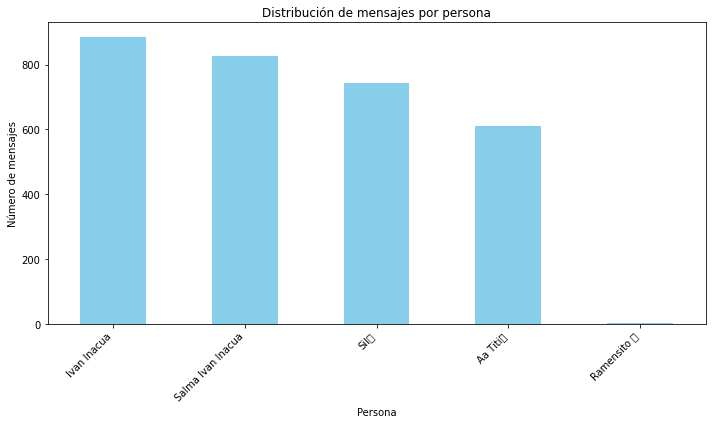

In [7]:
# Contar los mensajes por persona
conteo_mensajes = df_ramencito['Persona'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(10, 6))
conteo_mensajes.plot(kind='bar', color='skyblue')
plt.title('Distribución de mensajes por persona')
plt.xlabel('Persona')
plt.ylabel('Número de mensajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/1209965265.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ramencito['Fecha'] = pd.to_datetime(df_ramencito['Fecha'] + ' ' + df_ramencito['Hora'])


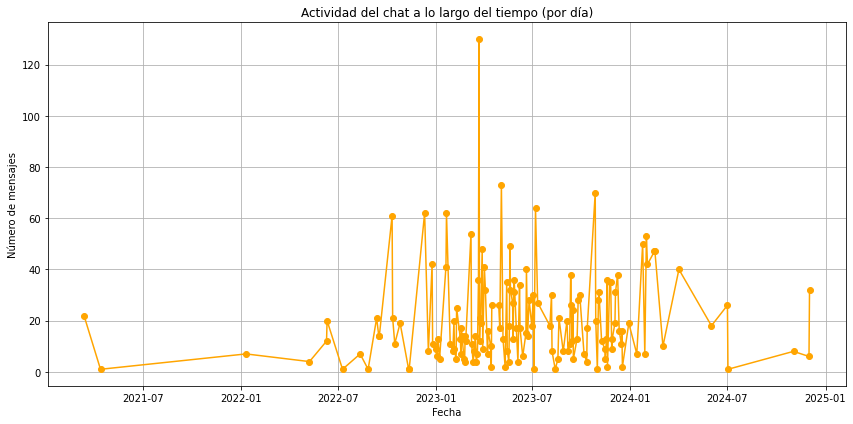

In [8]:
df_ramencito['Fecha'] = pd.to_datetime(df_ramencito['Fecha'] + ' ' + df_ramencito['Hora'])

# Agrupar los mensajes por día y contar el número de mensajes en cada día
actividad_diaria = df_ramencito.groupby(df_ramencito['Fecha'].dt.date).size()

# Visualizar la actividad del chat a lo largo del tiempo
plt.figure(figsize=(12, 6))
actividad_diaria.plot(marker='o', color='orange')
plt.title('Actividad del chat a lo largo del tiempo (por día)')
plt.xlabel('Fecha')
plt.ylabel('Número de mensajes')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2544535929.py:14: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  plt.tight_layout()
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2544535929.py:14: UserWarning: Glyph 127836 (\N{STEAMING BOWL}) missing from current font.
  plt.tight_layout()
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2544535929.py:14: UserWarning: Glyph 128040 (\N{KOALA}) missing from current font.
  plt.tight_layout()
/Users/sil/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sil/miniconda3/envs/jupyter_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127836 (\N{STEAMING BOWL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sil/miniconda3/envs/jupyter_env/lib/python

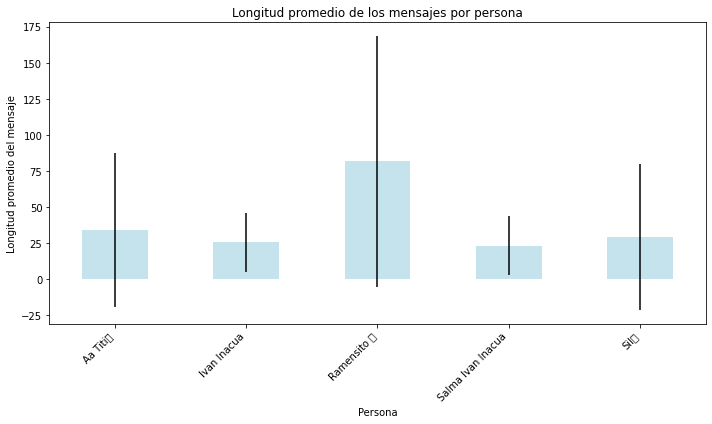

In [9]:
# Calcular la longitud de cada mensaje
df_ramencito['Longitud del mensaje'] = df_ramencito['Mensaje'].apply(len)

# Agrupar los mensajes por persona y calcular estadísticas sobre la longitud de los mensajes
estadisticas_longitud = df_ramencito.groupby('Persona')['Longitud del mensaje'].describe()

# Visualizar la distribución de la longitud de los mensajes por persona
plt.figure(figsize=(10, 6))
estadisticas_longitud['mean'].plot(kind='bar', color='lightblue', alpha=0.7, yerr=estadisticas_longitud['std'])
plt.title('Longitud promedio de los mensajes por persona')
plt.xlabel('Persona')
plt.ylabel('Longitud promedio del mensaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

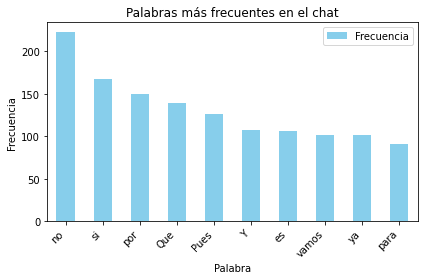

In [10]:
# Concatenar todos los mensajes en un solo texto
todos_los_mensajes = ' '.join(df_ramencito['Mensaje'])

# Dividir el texto en palabras individuales
palabras = todos_los_mensajes.split()

# Contar la frecuencia de cada palabra
conteo_palabras = Counter(palabras)

# Palabras irrelevantes que quieres eliminar del análisis (opcional)
palabras_irrelevantes = ['el', 'la', 'los', 'las', 'de', 'que', 'a', 'y', 'en', 'con', 'Yo', 'me',
                         'mí', 'conmigo', 'Nosotros', 'nos', 'nosotras', 'Tú', 'te', 'ti', 'contigo',
                         'usted', 'vos', 'Vosotros', 'vosotras', 'os', 'ustedes', 'Él', 'lo', 'le', 
                         'se', 'sí', 'consigo', 'ella', 'la', 'ello', 'lo', 'Ellos', 'ellas', 'los',
                         'las', 'les', 'se', 'un', 'una']

# Eliminar palabras irrelevantes del conteo
for palabra in palabras_irrelevantes:
    del conteo_palabras[palabra]

# Obtener las palabras más frecuentes y su frecuencia de aparición
palabras_mas_frecuentes = conteo_palabras.most_common(10)

# Visualizar las palabras más frecuentes
plt.figure(figsize=(10, 6))
palabras_df = pd.DataFrame(palabras_mas_frecuentes, columns=['Palabra', 'Frecuencia'])
palabras_df.plot(kind='bar', x='Palabra', y='Frecuencia', color='skyblue')
plt.title('Palabras más frecuentes en el chat')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ANALISIS DE SENTIMIENTOS

In [16]:
df_ramencito = pd.DataFrame(df_ramencito, columns=["Fecha", 'Hora', 'Persona', 'Mensaje'])
df_ramencito['Fecha'] = pd.to_datetime(df_ramencito['Fecha'])

data = df_ramencito.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Mensaje"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Mensaje"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Mensaje"]]
print(data.head())

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_23594/2798430648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ramencito['Fecha'] = pd.to_datetime(df_ramencito['Fecha'])


       Fecha      Hora      Persona  \
0 2021-03-12  21:01:51  Ramensito 🍜   
1 2021-03-12  21:01:51     Aa Titi💜   
2 2021-03-12  21:01:51  Ramensito 🍜   
3 2021-03-12  21:02:09     Aa Titi💜   
4 2021-03-12  21:08:27  Ivan Inacua   

                                             Mensaje  Positive  Negative  \
0  ‎Los mensajes y las llamadas están cifrados de...       0.0       0.0   
1             ‎Aa Titi💜 creó el grupo “Ramensito 🍜”.       0.0       0.0   
2                               ‎Aa Titi💜 te añadió.       0.0       0.0   
3                                              Hola!       0.0       0.0   
4                             Hola buenas madrugadas       0.0       0.0   

   Neutral  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
